
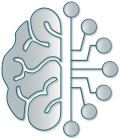

**Start at:** Monday 29 September 2025, 20:07:11  
**Hostname:** device-8.home (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/pyPhysChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

In [1]:
import os
import sys

cwd0 = './config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import color, fg, bg, hl
vID.init(cwd0)
import tools4pyPhysChem as t4pPC

#cancel the "last show-up" behaviour of Jupyter notebooks
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# SandBox

## PDF to RDF

rdf between 0.0 Å and 50.0 Å. Step = 0.01 Å. Number of values = 5001
First intense peak found at: 2.85 Å. g(r) = 6.31


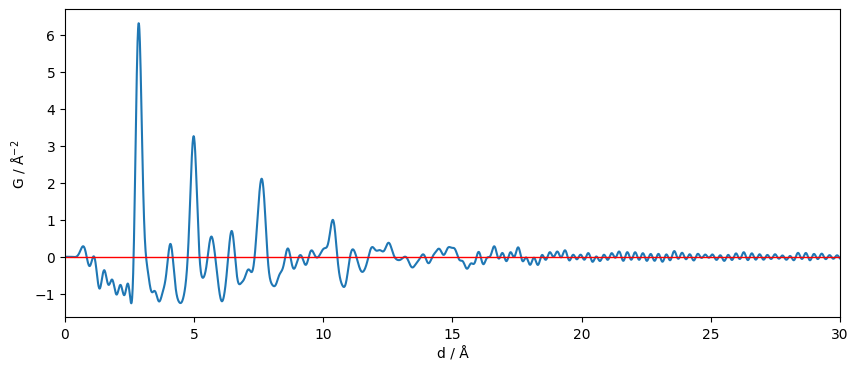

rdf between 0.0 Å and 30.0 Å. Step = 0.01 Å. Number of values = 3001
First intense peak found at: 2.85 Å. g(r) = 5.96


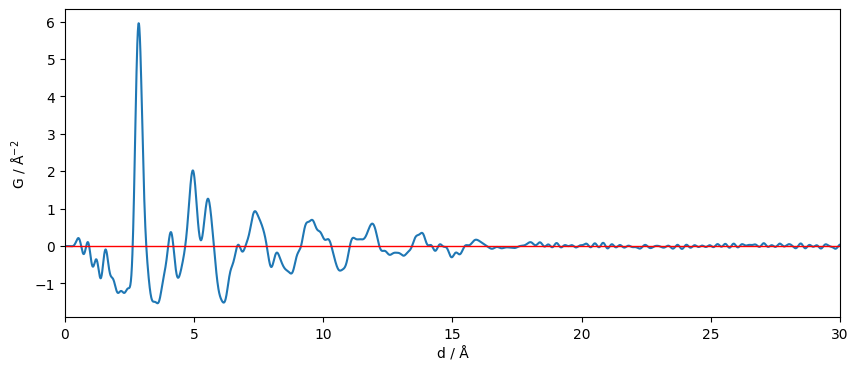

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
from scipy.signal import find_peaks
pathway2rdfExp = "./ML-data/RDFs/expRDF/"

#########################################################################################################################################

t4pPC.centertxt("PDF of a pentagonal bipyramid AuNP (recorded by N. Ratel-Ramond, LPCNO, Toulouse, France)",size=14,weight='bold')
rDeca,grDeca = np.genfromtxt(pathway2rdfExp+"AuNP-CGSR_021_decahedron.csv", delimiter="\t", unpack=True, skip_header=1)
print(f"rdf between {rDeca[0]} Å and {rDeca[-1]} Å. Step = {rDeca[1]-rDeca[0]} Å. Number of values = {len(rDeca)}")
peaksDeca, _ = find_peaks(grDeca,height=1)
print(f"First intense peak found at: {rDeca[peaksDeca[0]]:.2f} Å. g(r) = {grDeca[peaksDeca[0]]:.2f}")

_ = plt.figure(figsize=(10,4))
_ = plt.plot(rDeca,grDeca)
_ = plt.xlabel("d / Å")
_ = plt.ylabel("G / Å$^{-2}$")
_ = plt.axhline(y=0,linewidth=1,color='r')
_ = plt.xlim(0,30)
_ = plt.show()

#########################################################################################################################################

t4pPC.centertxt("PDF of an icosahedral AuNP (recorded by N. Ratel-Ramond, LPCNO, Toulouse, France)",size=14,weight='bold')
rIco,grIco = np.genfromtxt(pathway2rdfExp+"AuNP-NS_Ti25C_1000_0001_0001_icosahedron.csv", delimiter="\t", unpack=True, skip_header=1)
print(f"rdf between {rIco[0]} Å and {rIco[-1]} Å. Step = {rIco[1]-rIco[0]} Å. Number of values = {len(rIco)}")
peaksIco, _ = find_peaks(grIco,height=1)
print(f"First intense peak found at: {rIco[peaksIco[0]]:.2f} Å. g(r) = {grIco[peaksIco[0]]:.2f}")

_ = plt.figure(figsize=(10,4))
_ = plt.plot(rIco,grIco)
_ = plt.xlabel("d / Å")
_ = plt.ylabel("G / Å$^{-2}$")
_ = plt.axhline(y=0,linewidth=1,color='r')
_ = plt.xlim(0,30)
_ = plt.show()

[0.000e+00 1.000e-02 2.000e-02 ... 4.998e+01 4.999e+01 5.000e+01]
-0.5407280958587143 0.2776963323538378


<Figure size 700x500 with 0 Axes>

Text(0.5, 0, 'x')

Text(0, 0.5, 'f(x)')

(0.0, 10.0)

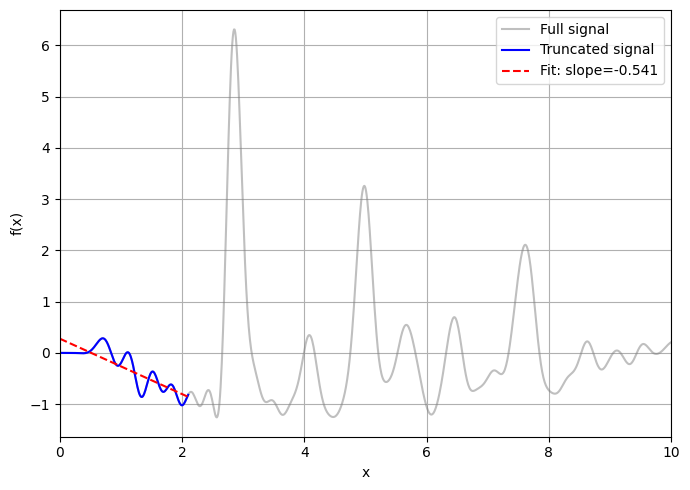

In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np
print(rDeca)
mask = rDeca <= 2.1
x_sub = rDeca[mask]
y_sub = grDeca[mask]

X_sub = x_sub.reshape(-1,1)
model = LinearRegression().fit(X_sub, y_sub)
av_slope = model.coef_[0]
intercept = model.intercept_

print(av_slope, intercept)

# --- Line predicted by regression ---
y_fit = model.predict(X_sub)

# --- Plot ---
plt.figure(figsize=(7,5))
plt.plot(rDeca, grDeca, "gray", alpha=0.5, label="Full signal")
plt.plot(x_sub, y_sub, "b", label="Truncated signal")
plt.plot(x_sub, y_fit, "r--", label=f"Fit: slope={av_slope:.3f}")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.xlim(0,10)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

$$G(r)=4\pi r\rho(r)-4\pi r\rho_{0}$$

$$RDF(r)=G(r)+4\pi r\rho_{0}$$

0.05900624460577753


rdf between 0.0 Å and 50.0 Å. Step = 0.01 Å. Number of values = 5001


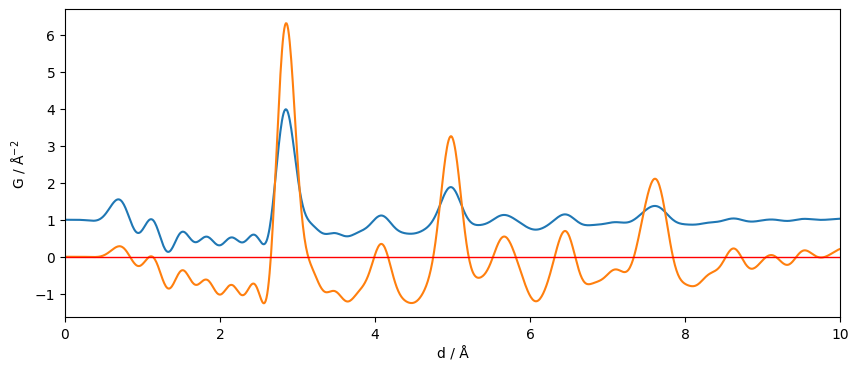

In [15]:
# RDFDeca = grDeca - 4 * np.pi * rDeca * av_slope
# === Gold atomic density rho0 (atoms / Å^3) ===
rho_mass = 19.3      # g/cm^3
M = 196.97           # g/mol
NA = 6.022e23        # mol^-1
rho0 = (rho_mass / M) * NA / 1e24  # atoms/Å^3
print(rho0)
eps=1e-8
RDFDeca = 1+ grDeca/(4*np.pi*(rDeca+eps)*rho0)
# RDFDeca = grDeca**2
# 
t4pPC.centertxt("RDF of a pentagonal bipyramid AuNP (recorded by N. Ratel-Ramond, LPCNO, Toulouse, France)",size=14,weight='bold')
print(f"rdf between {rDeca[0]} Å and {rDeca[-1]} Å. Step = {rDeca[1]-rDeca[0]} Å. Number of values = {len(rDeca)}")
# peaksDeca, _ = find_peaks(RDFDeca,height=1)
# print(f"First intense peak found at: {rDeca[peaksDeca[0]]:.2f} Å. g(r) = {RDFDeca[peaksDeca[0]]:.2f}")

_ = plt.figure(figsize=(10,4))
_ = plt.plot(rDeca,RDFDeca)
_ = plt.plot(rDeca,grDeca)
_ = plt.xlabel("d / Å")
_ = plt.ylabel("G / Å$^{-2}$")
_ = plt.axhline(y=0,linewidth=1,color='r')
_ = plt.xlim(0,10)
_ = plt.show()

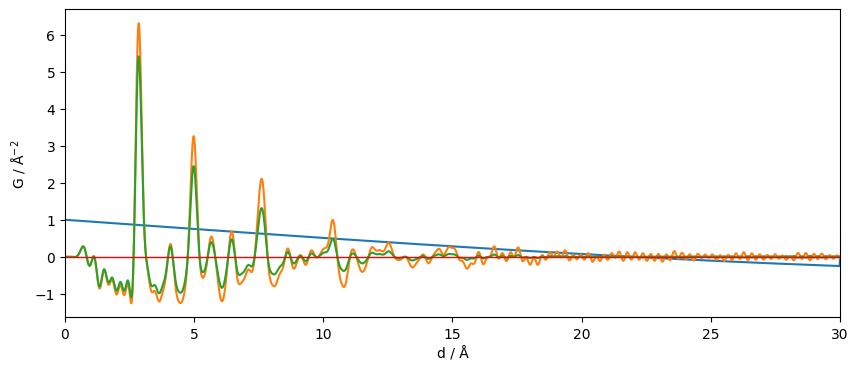

In [28]:
def spherical_envelope(r, R):
    f = np.zeros_like(r)
    mask = r < 2*R
    f[mask] = 1 - 3*r[mask]/(4*R) + 0.25*(r[mask]/(2*R))**3
    return f

R = 15.0  # e.g. nanoparticle radius in Å
envelope = spherical_envelope(rDeca, R)
g_finite = grDeca * envelope


_ = plt.figure(figsize=(10,4))
_ = plt.plot(rDeca,envelope)
_ = plt.plot(rDeca,grDeca)
_ = plt.plot(rDeca,g_finite)
_ = plt.xlabel("d / Å")
_ = plt.ylabel("G / Å$^{-2}$")
_ = plt.axhline(y=0,linewidth=1,color='r')
_ = plt.xlim(0,30)
_ = plt.show()


<Figure size 800x500 with 0 Axes>

Text(0.5, 0, 'r (Å)')

Text(0, 0.5, 'g(r)')

(0.0, 20.0)

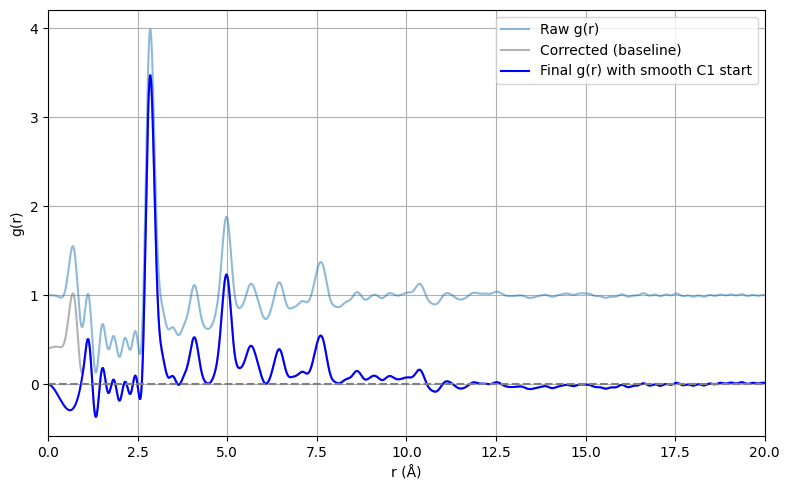

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import UnivariateSpline

# --- Load file ---
df = pd.read_csv("./ML-data/RDFs/expRDF/AuNP-CGSR_021_decahedron.csv", sep="\t")
df.columns = ["r", "G"]

# Gold parameters
rho_mass = 19.3
M = 196.97
NA = 6.022e23
rho0 = (rho_mass / M) * NA / 1e24

# g(r)
df["g"] = 1 + df["G"] / (4*np.pi*df["r"].replace(0, np.nan)*rho0)
r = df["r"].values
g = df["g"].values

# --- Baseline correction ---
minima_idx, _ = find_peaks(-g, distance=20)
r_min, g_min = r[minima_idx], g[minima_idx]
spline = UnivariateSpline(r_min, g_min, s=0.5)
f_r = spline(r)
g_corr = g - f_r

# --- Smooth replacement near r=0 with C1 continuity ---
r_cut = 1.0
mask_low = r <= r_cut
mask_high = r > r_cut

# Values and slope at r_cut
y_cut = g_corr[r >= r_cut][0]
dy_cut = np.gradient(g_corr, r)[r >= r_cut][0]

# Solve for cubic coefficients: p(r) = a r^3 + b r^2 + c r + d
# Conditions: p(0)=0, p'(0)=0, p(r_cut)=y_cut, p'(r_cut)=dy_cut
# => d=0, c=0
# => system for a,b:
#   a r_cut^3 + b r_cut^2 = y_cut
#   3 a r_cut^2 + 2 b r_cut = dy_cut
A = np.array([[r_cut**3, r_cut**2],
              [3*r_cut**2, 2*r_cut]])
B = np.array([y_cut, dy_cut])
a, b = np.linalg.solve(A, B)

def poly_smooth(r):
    return a*r**3 + b*r**2

# Replace low region
g_final = np.copy(g_corr)
g_final[mask_low] = poly_smooth(r[mask_low])

# --- Plot ---
plt.figure(figsize=(8,5))
plt.plot(r, g, label="Raw g(r)", alpha=0.5)
plt.plot(r, g_corr, "gray", alpha=0.6, label="Corrected (baseline)")
plt.plot(r, g_final, "b", label="Final g(r) with smooth C1 start")
plt.axhline(0, color="gray", ls="--")
plt.xlabel("r (Å)")
plt.ylabel("g(r)")
plt.legend()
plt.xlim(0,20)
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

Text(0.5, 0, 'r (Å)')

Text(0, 0.5, 'g(r)')

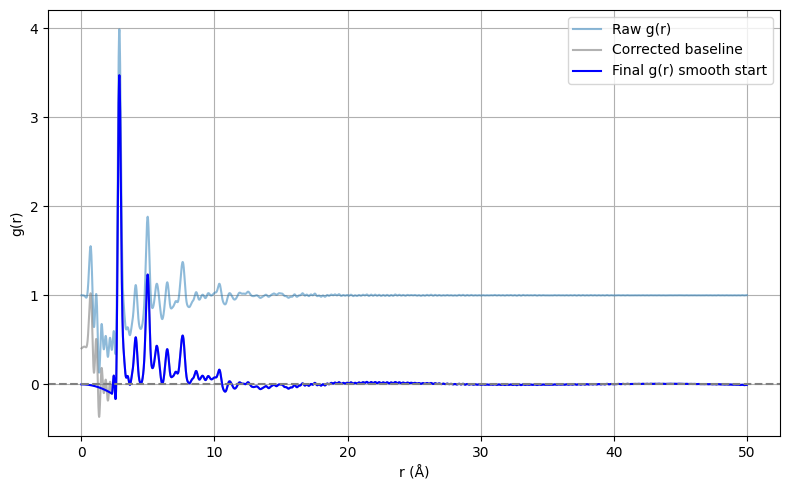

In [39]:
r_cut = 2.3
mask_low = r <= r_cut

# valeur cible à r_cut
y_cut = g_corr[r >= r_cut][0]

# Quadratic smooth
alpha = y_cut / (r_cut**2)
g_smooth = alpha * r[mask_low]**2

# Merge
g_final = np.copy(g_corr)
g_final[mask_low] = g_smooth

# Plot
plt.figure(figsize=(8,5))
plt.plot(r, g, label="Raw g(r)", alpha=0.5)
plt.plot(r, g_corr, "gray", alpha=0.6, label="Corrected baseline")
plt.plot(r, g_final, "b", label="Final g(r) smooth start")
plt.axhline(0, color="gray", ls="--")
plt.xlabel("r (Å)")
plt.ylabel("g(r)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

Text(0.5, 0, 'r (Å)')

Text(0, 0.5, 'g(r)')

(0.0, 20.0)

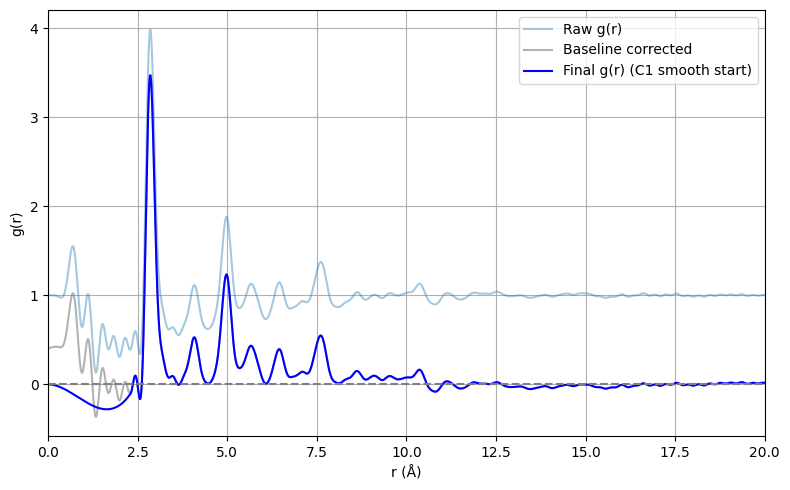

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import UnivariateSpline

# --- Load file ---
df = pd.read_csv("./ML-data/RDFs/expRDF/AuNP-CGSR_021_decahedron.csv", sep="\t")
df.columns = ["r", "G"]

# Densité atomique de l'or
rho_mass = 19.3
M = 196.97
NA = 6.022e23
rho0 = (rho_mass / M) * NA / 1e24

# g(r) à partir de G(r)
df["g"] = 1 + df["G"] / (4*np.pi*df["r"].replace(0, np.nan)*rho0)
r = df["r"].values
g = df["g"].values

# --- Correction baseline par spline sur minima ---
minima_idx, _ = find_peaks(-g, distance=20)
r_min, g_min = r[minima_idx], g[minima_idx]
spline = UnivariateSpline(r_min, g_min, s=0.5)
f_r = spline(r)
g_corr = g - f_r

# --- Remplacement du début par polynôme cubique raccordé ---
r_cut = 2.3
mask_low = r <= r_cut
mask_high = r > r_cut

# Valeur et pente en r_cut
y_cut = g_corr[r >= r_cut][0]
dy_cut = np.gradient(g_corr, r)[r >= r_cut][0]

# Résolution du système pour a et b
A = np.array([[r_cut**3, r_cut**2],
              [3*r_cut**2, 2*r_cut]])
B = np.array([y_cut, dy_cut])
a, b = np.linalg.solve(A, B)

def poly_smooth(rr):
    return a*rr**3 + b*rr**2

g_final = np.copy(g_corr)
g_final[mask_low] = poly_smooth(r[mask_low])

# --- Plot ---
plt.figure(figsize=(8,5))
plt.plot(r, g, label="Raw g(r)", alpha=0.4)
plt.plot(r, g_corr, "gray", alpha=0.6, label="Baseline corrected")
plt.plot(r, g_final, "b", label="Final g(r) (C1 smooth start)")
plt.axhline(0, color="gray", ls="--")
plt.xlabel("r (Å)")
plt.ylabel("g(r)")
plt.legend()
plt.xlim(0,20)
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

Text(0.5, 0, 'r (Å)')

Text(0, 0.5, 'g(r)')

(0.0, 20.0)

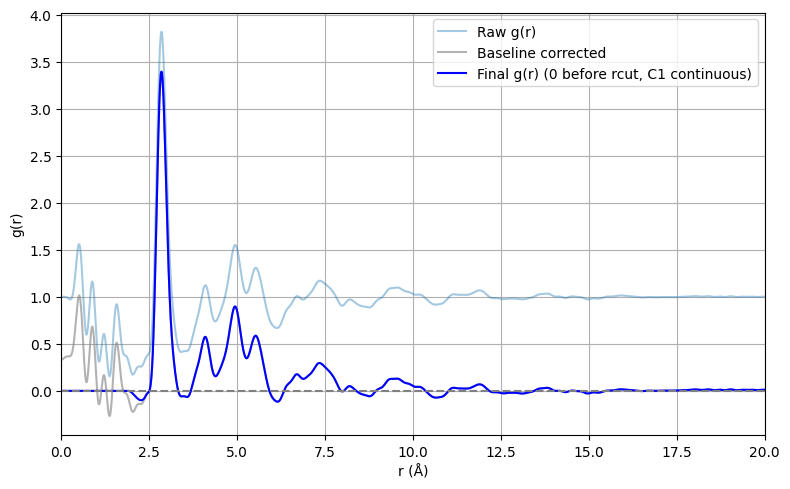

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import UnivariateSpline

# --- Load file ---
# df = pd.read_csv("./ML-data/RDFs/expRDF/AuNP-CGSR_021_decahedron.csv", sep="\t")
df = pd.read_csv("./ML-data/RDFs/expRDF/AuNP-NS_Ti25C_1000_0001_0001_icosahedron.csv", sep="\t")
df.columns = ["r", "G"]

# Densité atomique de l'or
rho_mass = 19.3
M = 196.97
NA = 6.022e23
rho0 = (rho_mass / M) * NA / 1e24

# g(r)
df["g"] = 1 + df["G"] / (4*np.pi*df["r"].replace(0, np.nan)*rho0)
r = df["r"].values
g = df["g"].values

# --- Correction baseline ---
minima_idx, _ = find_peaks(-g, distance=20)
r_min, g_min = r[minima_idx], g[minima_idx]
spline = UnivariateSpline(r_min, g_min, s=0.5)
f_r = spline(r)
g_corr = g - f_r

# --- Forcer g=0 avant r_cut avec continuité de dérivée ---
r_cut = 2.4
delta = 0.5   # zone de transition lissée (Å)

mask_left = r < (r_cut - delta)
mask_mid  = (r >= (r_cut - delta)) & (r <= r_cut)
mask_right = r > r_cut

# Valeurs et pente au point de raccord
y_cut = g_corr[r >= r_cut][0]
dy_cut = np.gradient(g_corr, r)[r >= r_cut][0]

# Conditions pour un polynôme cubique p(r) = a r^3 + b r^2 + c r + d
# On travaille en coordonnées locales u = r - (r_cut - delta)
# Avec u=0: p=0, p'=0 ; avec u=delta: p=y_cut, p'=dy_cut
u = r[mask_mid] - (r_cut - delta)

A = np.array([[delta**3, delta**2],
              [3*delta**2, 2*delta]])
B = np.array([y_cut, dy_cut])
a, b = np.linalg.solve(A, B)

def poly_transition(u):
    return a*u**3 + b*u**2

g_final = np.zeros_like(g_corr)
g_final[mask_left] = 0
g_final[mask_mid] = poly_transition(u)
g_final[mask_right] = g_corr[mask_right]

# --- Plot ---
plt.figure(figsize=(8,5))
plt.plot(r, g, label="Raw g(r)", alpha=0.4)
plt.plot(r, g_corr, "gray", alpha=0.6, label="Baseline corrected")
plt.plot(r, g_final, "b", label="Final g(r) (0 before rcut, C1 continuous)")
plt.axhline(0, color="gray", ls="--")
plt.xlabel("r (Å)")
plt.ylabel("g(r)")
plt.xlim(0,20)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [49]:
df_out = pd.DataFrame({"r(Å)": r, "g(r)": g_final})
df_out.to_csv("./ML-data/RDFs/expRDF/AuNP-CGSR_021_decahedron_corrected.csv", sep="\t", index=False)


In [51]:
df_out = pd.DataFrame({"r(Å)": r, "g(r)": g_final})
df_out.to_csv("./ML-data/RDFs/expRDF/AuNP-NS_Ti25C_1000_0001_0001_icosahedron_corrected.csv", sep="\t", index=False)


## SHAP & Images

<div class="intro">
    
[see SHAP website](https://shap.readthedocs.io/en/latest/example_notebooks/image_examples/image_classification/Multi-input%20Gradient%20Explainer%20MNIST%20Example.html)
    
Pourquoi deux inputs ?

👉 C’est un exemple pédagogique du site SHAP, pas une architecture utile pour MNIST en pratique.

- input1 : l’image est simplement aplaties en vecteur brut (28×28 = 784 pixels).

- input2 : la même image passe dans un Conv2D pour en extraire des features plus abstraites.

Ensuite on concatène les deux représentations (brute + features convolutionnels) dans un vecteur commun (joint).
Ce vecteur sert à prédire la classe avec une couche dense + softmax.

En résumé :

L’idée est de construire un modèle artificiellement multi‐entrée, pour montrer que SHAP peut expliquer des modèles avec plusieurs entrées.   
</div>


### Tests et mise au point

In [4]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten

# load the MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# define our model
input1 = Input(shape=(28, 28, 1))
input2 = Input(shape=(28, 28, 1))
input2c = Conv2D(32, kernel_size=(3, 3), activation="relu")(input2)
joint = tf.keras.layers.concatenate([Flatten()(input1), Flatten()(input2c)])
out = Dense(10, activation="softmax")(Dropout(0.2)(Dense(128, activation="relu")(joint)))
model = tf.keras.models.Model(inputs=[input1, input2], outputs=out)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

2025-09-30 20:53:24.915105: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-30 20:53:24.915404: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-30 20:53:24.964252: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-30 20:53:26.286672: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


2025-09-30 20:53:34.805447: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [5]:
# fit the model
model.fit([x_train, x_train], y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9516 - loss: 0.1597
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9812 - loss: 0.0612
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9871 - loss: 0.0403
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9903 - loss: 0.0293
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9917 - loss: 0.0252


In [6]:
import shap

# since we have two inputs we pass a list of inputs to the explainer
explainer = shap.GradientExplainer(model, [x_train, x_train])

# we explain the model's predictions on the first three samples of the test set
shap_values = explainer.shap_values([x_test[:3], x_test[:3]])

In [7]:
for i, sv in enumerate(shap_values):
    print(f"Input {i} shap_values shape:", sv.shape)


Input 0 shap_values shape: (3, 28, 28, 1, 10)
Input 1 shap_values shape: (3, 28, 28, 1, 10)


In [8]:
# since the model has 10 outputs we get a list of 10 explanations (one for each output)
print(len(shap_values))

2


In [9]:
# since the model has 2 inputs we get a list of 2 explanations (one for each input) for each output
print(len(shap_values[0]))

3


<div class="intro">

On va bâtir un modèle plus simple, à un seul input
</div>

In [10]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D

# === 1. Charger les données MNIST ===
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # normalisation
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32")
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32")

# === 2. Définir le modèle CNN classique ===
input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, kernel_size=(3, 3), activation="relu")(input_img)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, kernel_size=(3, 3), activation="relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(10, activation="softmax")(x)

model = tf.keras.models.Model(inputs=input_img, outputs=output)

# === 3. Compilation ===
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# === 4. Entraînement ===
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

# === 5. Évaluation ===
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9006 - loss: 0.3206 - val_accuracy: 0.9823 - val_loss: 0.0625
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9675 - loss: 0.1058 - val_accuracy: 0.9853 - val_loss: 0.0512
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9777 - loss: 0.0763 - val_accuracy: 0.9878 - val_loss: 0.0385
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9808 - loss: 0.0623 - val_accuracy: 0.9893 - val_loss: 0.0375
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9839 - loss: 0.0532 - val_accuracy: 0.9918 - val_loss: 0.0333
Test accuracy: 0.9904


In [11]:
import numpy as np

n_samples = 5
n_classes = 10

# Background aléatoire (sert uniquement de baseline)
background = x_train[np.random.choice(x_train.shape[0], 200, replace=False)]
print(f"{background.shape=}")

# Explainer basé sur ce background
explainer = shap.DeepExplainer(model, background)

# Explication sur les images de test (celles qu’on veut afficher)
X_explain = x_test[:n_samples]
shap_values = explainer.shap_values(X_explain)
print("Type of shap_values = ", type(shap_values))
print("Shape shap_values = ", shap_values.shape)

# Vérification des prédictions sur les images expliquées
probs = model.predict(X_explain, verbose=0)  # shape (n_samples, n_classes)
pred_classes = np.argmax(probs, axis=1)
for i in range(n_samples):
    print(f"Image {i} = {y_test[i]}: prédite {pred_classes[i]} avec proba {probs[i, pred_classes[i]]:.3f}")

background.shape=(200, 28, 28, 1)


/home/romuald/Python3/ML/lib64/python3.11/site-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/home/romuald/Python3/ML/lib/python3.11/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_9
Received: inputs=['Tensor(shape=(200, 28, 28, 1))']
  warnings.warn(msg)
/home/romuald/Python3/ML/lib/python3.11/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_9
Received: inputs=['Tensor(shape=(400, 28, 28, 1))']
  warnings.warn(msg)


Type of shap_values =  <class 'numpy.ndarray'>
Shape shap_values =  (5, 28, 28, 1, 10)
Image 0 = 7: prédite 7 avec proba 1.000
Image 1 = 2: prédite 2 avec proba 1.000
Image 2 = 1: prédite 1 avec proba 1.000
Image 3 = 0: prédite 0 avec proba 1.000
Image 4 = 4: prédite 4 avec proba 1.000


/home/romuald/Python3/ML/lib/python3.11/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_9
Received: inputs=['Tensor(shape=(5, 28, 28, 1))']
  warnings.warn(msg)


/tmp/ipykernel_63774/1712970784.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


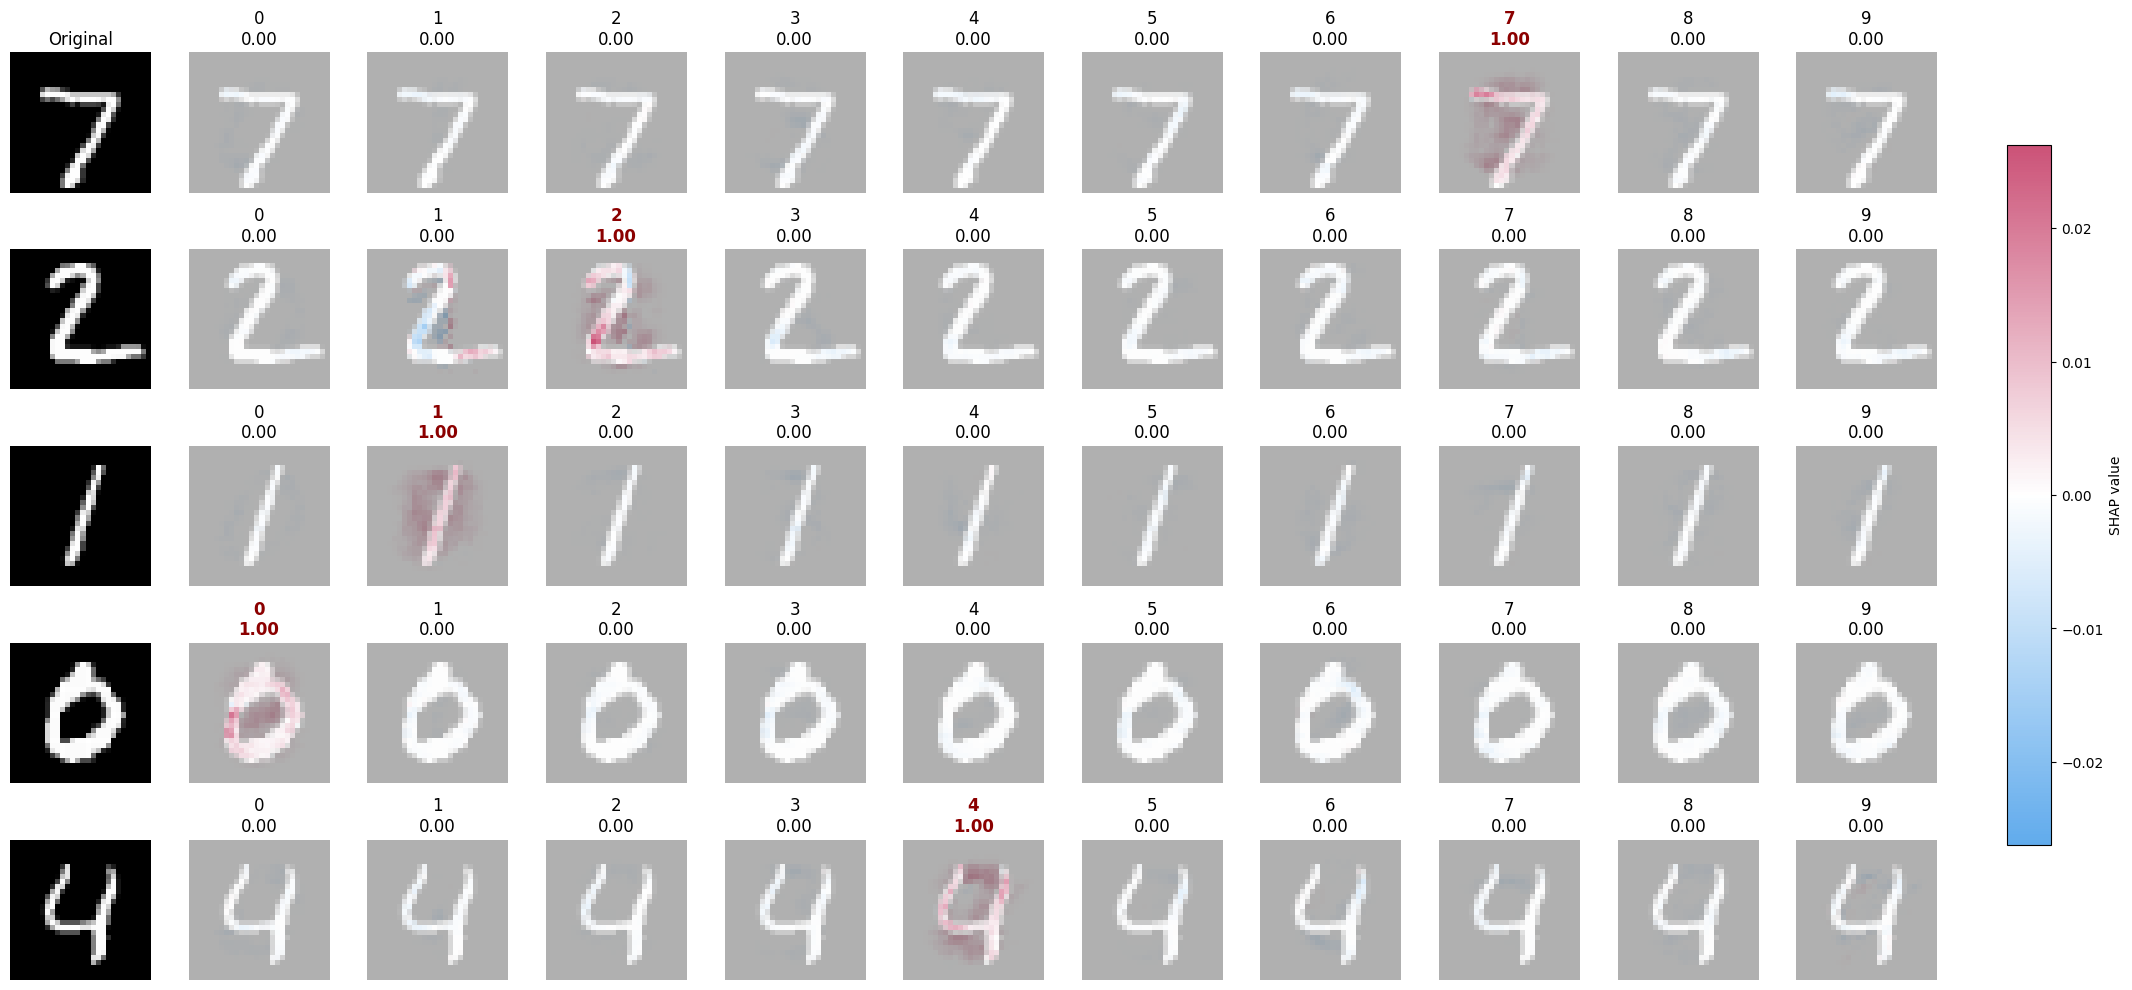

In [12]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Définir la colormap SHAP (bleu → blanc → rouge)
shap_cmap = mcolors.LinearSegmentedColormap.from_list(
    "shap",
    ["#1e88e5", "white", "#b6093e"]
)

# bornes symétriques autour de 0
m = np.max(np.abs(shap_values))  # global max

fig, axes = plt.subplots(n_samples, n_classes+1, figsize=(2*(n_classes+1), 2*n_samples))

for i in range(n_samples):         # ligne = image
    # --- première colonne : chiffre original ---
    _ = axes[i, 0].imshow(x_test[i].squeeze(), cmap="gray")
    _ = axes[i, 0].axis("off")
    if i == 0:
        _ = axes[i, 0].set_title("Original")

    # --- colonnes suivantes : SHAP values ---
    for j in range(n_classes):
        sv = shap_values[i, :, :, 0, j]

        _ = axes[i, j+1].imshow(x_test[i].squeeze(), cmap="gray")
        im = axes[i, j+1].imshow(sv, cmap=shap_cmap, alpha=0.7,
                                 vmin=-m, vmax=+m)
        _ = axes[i, j+1].axis("off")

        # Ajouter la proba en titre
        prob = probs[i, j]
        title = f"{j}\n{prob:.2f}"
        if j == pred_classes[i]:
            # mettre en évidence la classe prédite
            _ = axes[i, j+1].set_title(title, color="darkred", fontweight="bold")
        else:
            _ = axes[i, j+1].set_title(title)

# Ajouter une colorbar partagée
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  
fig.colorbar(im, cax=cbar_ax, orientation="vertical", label="SHAP value")

plt.tight_layout(rect=[0, 0, 0.9, 1])  
plt.show()


In [13]:
i = 0
class_ids = [2, 7]

for cls in class_ids:
    sv_sum = shap_values[i, :, :, 0, cls].sum()
    expected_value = explainer.expected_value[cls]
    prob_reconstructed = expected_value + sv_sum
    prob_model = probs[i, cls]

    print(f"--- Classe {cls} ---")
    print(f"Somme SHAP = {sv_sum:.4f}")
    print(f"Expected value = {expected_value:.4f}")
    print(f"Proba (reconstruite) = {prob_reconstructed:.4f}")
    print(f"Proba (modèle)       = {prob_model:.4f}")
    print()


--- Classe 2 ---
Somme SHAP = -0.0956
Expected value = 0.0956
Proba (reconstruite) = 0.0000
Proba (modèle)       = 0.0000

--- Classe 7 ---
Somme SHAP = 0.9087
Expected value = 0.0913
Proba (reconstruite) = 1.0000
Proba (modèle)       = 1.0000



/tmp/ipykernel_63774/3758712975.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


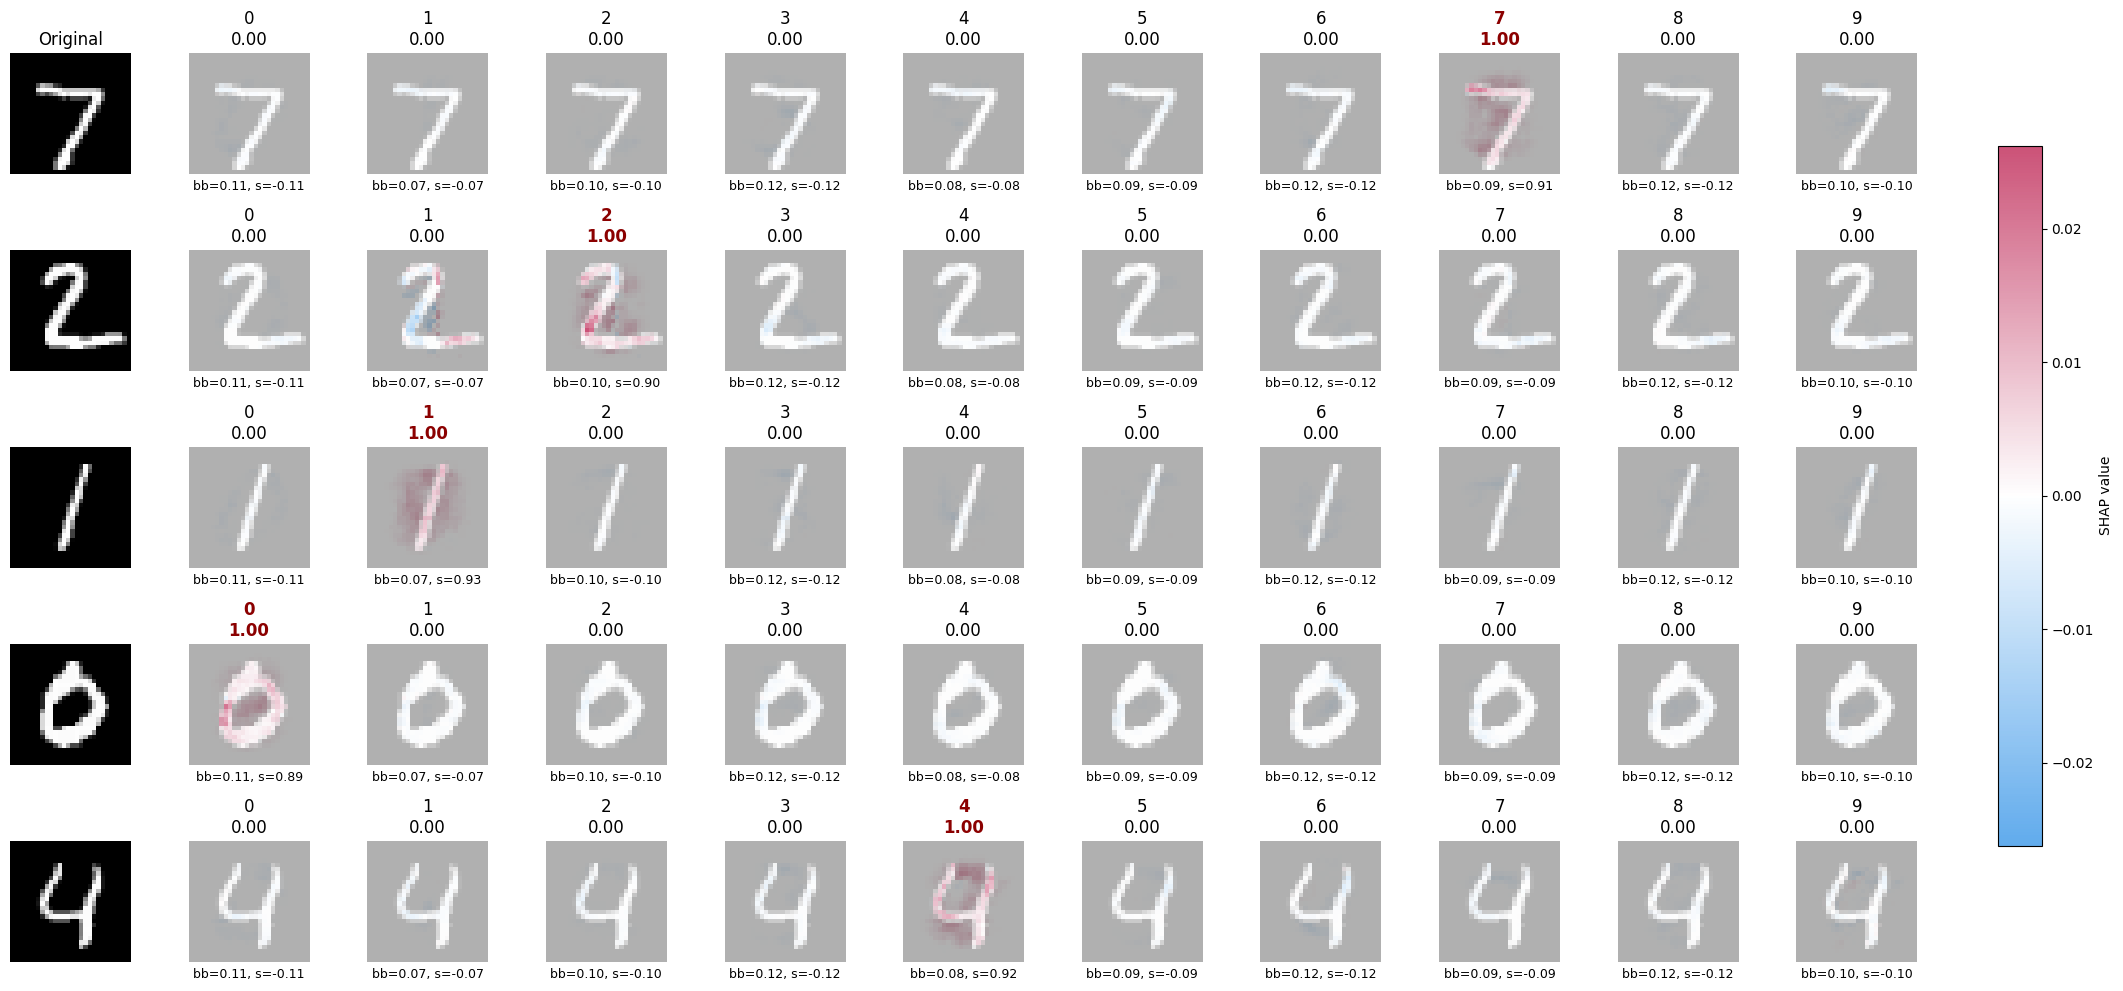

In [14]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Définir la colormap SHAP (bleu → blanc → rouge)
shap_cmap = mcolors.LinearSegmentedColormap.from_list(
    "shap",
    ["#1e88e5", "white", "#b6093e"]
)

# bornes symétriques autour de 0
m = np.max(np.abs(shap_values))  # global max

fig, axes = plt.subplots(n_samples, n_classes+1, figsize=(2*(n_classes+1), 2*n_samples))

for i in range(n_samples):         # ligne = image
    # --- première colonne : chiffre original ---
    _ = axes[i, 0].imshow(x_test[i].squeeze(), cmap="gray")
    _ = axes[i, 0].axis("off")
    if i == 0:
        _ = axes[i, 0].set_title("Original")

    # --- colonnes suivantes : SHAP values ---
    for j in range(n_classes):
        sv = shap_values[i, :, :, 0, j]

        _ = axes[i, j+1].imshow(x_test[i].squeeze(), cmap="gray")
        im = axes[i, j+1].imshow(sv, cmap=shap_cmap, alpha=0.7,
                                 vmin=-m, vmax=+m)
        _ = axes[i, j+1].axis("off")

        # Proba prédite
        prob = probs[i, j]

        # Décomposition additive
        sv_sum = sv.sum()
        base_val = explainer.expected_value[j]
        reconstructed = base_val + sv_sum

        # Ajouter la proba en titre
        title = f"{j}\n{prob:.2f}"
        if j == pred_classes[i]:
            _ = axes[i, j+1].set_title(title, color="darkred", fontweight="bold")
        else:
            _ = axes[i, j+1].set_title(title)

        # Ajouter base_value et somme SHAP en bas de la case
        text = f"bb={base_val:.2f}, s={sv_sum:.2f}"
        _ = axes[i, j+1].text(0.5, -0.05, text,
                              fontsize=9, ha="center", va="top",
                              transform=axes[i, j+1].transAxes)


# Ajouter une colorbar partagée
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  
fig.colorbar(im, cax=cbar_ax, orientation="vertical", label="SHAP value")

plt.tight_layout(rect=[0, 0, 0.9, 1])  
plt.show()


In [15]:
from tensorflow.keras.models import Model

# suppose que la dernière couche de ton modèle est une Dense(10, activation="softmax")
# alors l'avant-dernière est Dense(10) sans activation
model_logits = Model(inputs=model.input, outputs=model.layers[-2].output)

logits = model_logits.predict(x_test[i:i+1], verbose=0)[0]
print("Logits modèle :", logits)

for cls in [2, 7]:
    sv_sum = shap_values[i, :, :, 0, cls].sum()
    logit_reconstructed = explainer.expected_value[cls] + sv_sum
    print(f"Classe {cls} | logit shap {logit_reconstructed:.4f} | logit modèle {logits[cls]:.4f}")


Logits modèle : [0.         0.         0.82129353 0.         1.3823845  0.
 0.         0.         0.         0.         0.         0.
 0.         2.4148297  0.         0.         2.9368238  0.
 0.         0.         0.         2.4755738  0.         0.
 0.         0.         0.         5.322634   1.8679239  0.
 0.         0.         0.         5.165712   4.77594    1.3085207
 0.         1.1347834  0.         0.         0.         0.
 3.303994   0.         0.         1.5072328  0.         0.
 0.         0.43582237 0.         3.9654434  3.068095   0.
 1.2037861  0.         0.         0.         0.         0.
 0.         0.         3.414182   3.1166508  0.         0.
 0.         2.6457684  2.0924525  0.         0.         0.
 0.         0.         0.         2.1245193  3.4939215  0.
 0.         0.         0.         1.4111297  0.5288314  4.278394
 3.7562292  2.040825   0.9593     0.         0.         0.
 0.         0.         0.         1.0618839  0.         0.
 0.         0.         0.  

In [16]:
import tensorflow as tf
import numpy as np

def integrated_gradients(model, x, target_class_idx, baseline=None, steps=50):
    """
    Calcule les Integrated Gradients pour une seule image x.
    
    model : modèle Keras avec softmax en sortie
    x : image (shape (28,28,1))
    target_class_idx : index de la classe cible
    baseline : image de référence (par défaut image nulle)
    steps : nombre d'interpolations
    """
    if baseline is None:
        baseline = np.zeros_like(x).astype(np.float32)
    x = x.astype(np.float32)

    # interpolation entre baseline et image
    interpolated = np.array([baseline + (float(k)/steps)*(x - baseline) for k in range(steps+1)])
    interpolated = tf.convert_to_tensor(interpolated)

    with tf.GradientTape() as tape:
        tape.watch(interpolated)
        preds = model(interpolated)  # (steps+1, n_classes)
        probs = preds[:, target_class_idx]

    grads = tape.gradient(probs, interpolated).numpy()  # (steps+1, 28,28,1)

    # moyenne des gradients × différence image-baseline
    avg_grads = grads.mean(axis=0)
    integrated = (x - baseline) * avg_grads
    return integrated


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
True label = 7, Predicted = 7, prob = 1.000


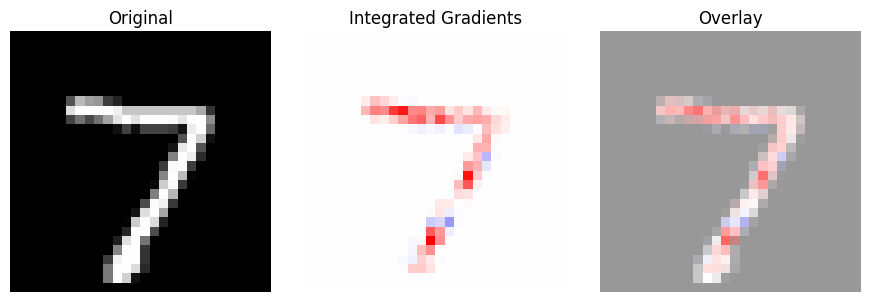

In [17]:
import matplotlib.pyplot as plt
import numpy as np

i = 0  # index de l'image testée
img = x_test[i]

pred = model.predict(img[np.newaxis, ...])
pred_class = np.argmax(pred)

print(f"True label = {y_test[i]}, Predicted = {pred_class}, prob = {pred[0,pred_class]:.3f}")

# calcul des Integrated Gradients pour la classe prédite
ig = integrated_gradients(model, img, pred_class, steps=50)

# bornes symétriques autour de 0
m = np.max(np.abs(ig))

plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.imshow(img.squeeze(), cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(ig.squeeze(), cmap="bwr", vmin=-m, vmax=m)
plt.title("Integrated Gradients")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(img.squeeze(), cmap="gray")
plt.imshow(ig.squeeze(), cmap="bwr", alpha=0.6, vmin=-m, vmax=m)
plt.title("Overlay")
plt.axis("off")

plt.tight_layout()
plt.show()


### Classe

In [18]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import shap

class ShapVisualizer:
    """
    Visualize SHAP values for CNN models on image data.

    This class overlays SHAP attribution maps on grayscale images 
    and displays, for each sample and each class:
    - the original image,
    - the SHAP heatmap,
    - the predicted probability,
    - the additive decomposition (base value + sum of SHAP, and reconstructed value).

    Parameters
    ----------
    model : keras.Model
        Trained Keras model with softmax output.
    explainer : shap.DeepExplainer
        SHAP explainer fitted on a background dataset.
    x_explain : np.ndarray
        Images to explain, shape (n_samples, H, W, 1).

    Attributes
    ----------
    shap_values : np.ndarray
        SHAP values of shape (n_samples, H, W, 1, n_classes).
    probs : np.ndarray
        Model predicted probabilities, shape (n_samples, n_classes).
    pred_classes : np.ndarray
        Indices of predicted classes, shape (n_samples,).
    n_samples : int
        Number of explained images.
    n_classes : int
        Number of output classes.
    """

    def __init__(self, model, explainer, x_explain):
        self.model = model
        self.explainer = explainer
        self.x_explain = x_explain

        # Compute SHAP values, predictions, classes
        self.shap_values = explainer.shap_values(x_explain)
        self.probs = model.predict(x_explain, verbose=0)
        self.pred_classes = np.argmax(self.probs, axis=1)

        # Dimensions
        self.n_samples = x_explain.shape[0]
        self.n_classes = self.probs.shape[1]

        # Define SHAP colormap (blue → white → red)
        self.shap_cmap = mcolors.LinearSegmentedColormap.from_list(
            "shap",
            ["#1e88e5", "white", "#b6093e"]
        )

    def plot(self):
        """Plot SHAP overlays for the explained images."""
        m = np.max(np.abs(self.shap_values))  # global symmetric scale

        fig, axes = plt.subplots(
            self.n_samples, self.n_classes+1,
            figsize=(2*(self.n_classes+1), 2*self.n_samples)
        )

        for i in range(self.n_samples):  # each row = one image
            # First column: original image
            _ = axes[i, 0].imshow(self.x_explain[i].squeeze(), cmap="gray")
            _ = axes[i, 0].axis("off")
            if i == 0:
                _ = axes[i, 0].set_title("Original")

            # Columns: SHAP heatmaps
            for j in range(self.n_classes):
                sv = self.shap_values[i, :, :, 0, j]
                _ = axes[i, j+1].imshow(self.x_explain[i].squeeze(), cmap="gray")
                im = axes[i, j+1].imshow(
                    sv, cmap=self.shap_cmap, alpha=0.7, vmin=-m, vmax=+m
                )
                _ = axes[i, j+1].axis("off")

                # Probability and decomposition
                prob = self.probs[i, j]
                sv_sum = sv.sum()
                base_val = self.explainer.expected_value[j]
                reconstructed = base_val + sv_sum

                # Title: class + probability
                title = f"{j}\n{prob:.2f}"
                if j == self.pred_classes[i]:
                    _ = axes[i, j+1].set_title(
                        title, color="darkred", fontweight="bold"
                    )
                else:
                    _ = axes[i, j+1].set_title(title)

                # Bottom text: base + SHAP sum + reconstructed
                text = f"bv={base_val:.2f}, s={sv_sum:.2f}"
                _ = axes[i, j+1].text(
                    0.5, -0.05, text,
                    fontsize=9, ha="center", va="top",
                    transform=axes[i, j+1].transAxes
                )

        # Shared colorbar
        cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
        fig.colorbar(im, cax=cbar_ax, orientation="vertical", label="SHAP value")

        plt.tight_layout(rect=[0, 0, 0.9, 1])
        plt.show()


background.shape=(200, 28, 28, 1)


/tmp/ipykernel_63774/2438476596.py:112: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


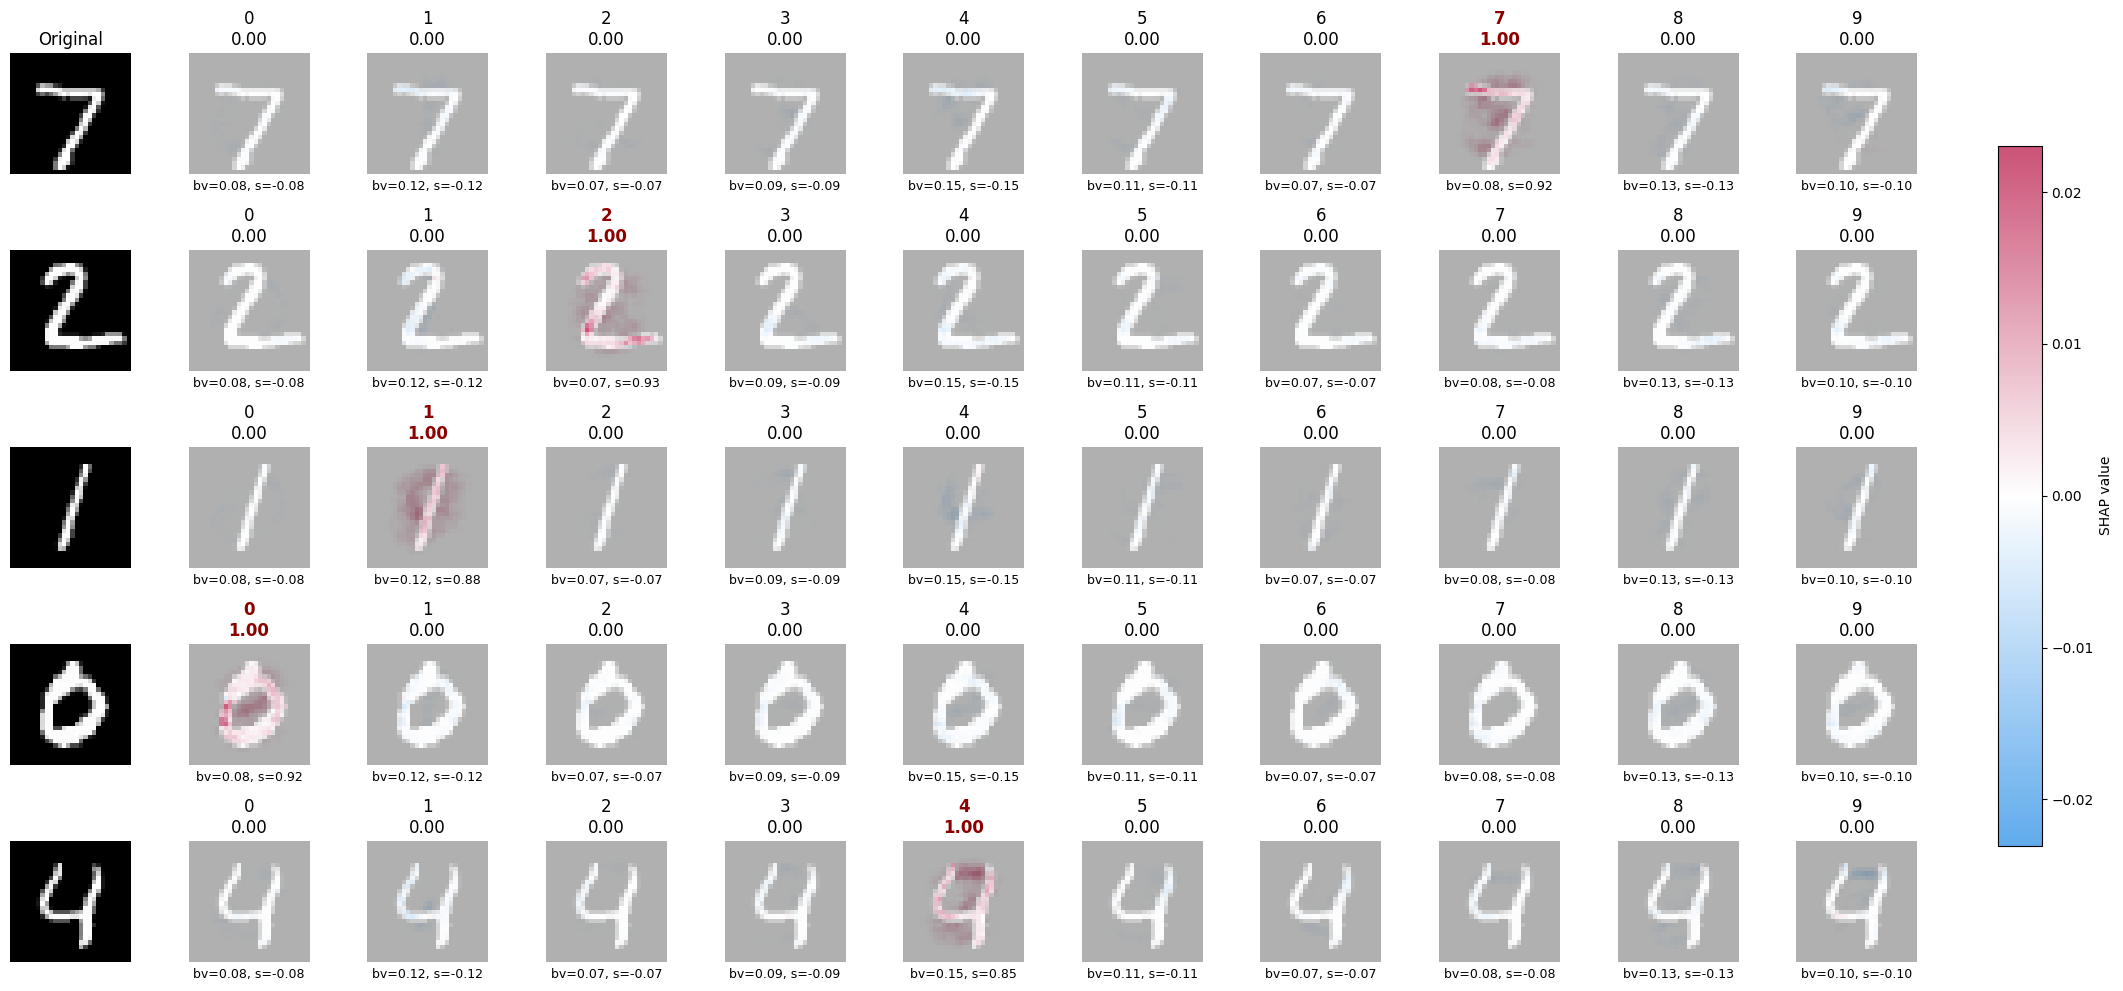

In [19]:
# Random background (used only as baseline)
background = x_train[np.random.choice(x_train.shape[0], 200, replace=False)]
print(f"{background.shape=}")

# Explainer built on this background
explainer = shap.DeepExplainer(model, background)

# Only pass the images you want to explain
visu = ShapVisualizer(model, explainer, x_test[:5])
visu.plot()
